In [1]:
import numpy as np
import pandas as pd
import torch

In [2]:
df = pd.read_csv('data/T1.csv')
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [4]:
df = df.rename(columns = {'LV ActivePower (kW)'	: 'ActivePower'})
df = df.rename(columns = {'Theoretical_Power_Curve (KWh)'	: 'TheoreticalPower'})
df = df.rename(columns = {'Wind Direction (°)'	: 'WindDirection'})
df = df.rename(columns = {'Wind Speed (m/s)'	: 'WindSpeed'})

In [6]:
df.tail()

,Date/Time,ActivePower,WindSpeed,TheoreticalPower,WindDirection
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620


In [10]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format = '%d %m %Y %H:%M')
df['Date'] = df['Date/Time'].dt.date
df['Time'] = df['Date/Time'].dt.time

In [11]:
df.head()

,Date/Time,ActivePower,WindSpeed,TheoreticalPower,WindDirection,Date,Time
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018-01-01,00:00:00
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018-01-01,00:10:00
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018-01-01,00:20:00
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018-01-01,00:30:00
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018-01-01,00:40:00


In [13]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [14]:
df.head()

,Date/Time,ActivePower,WindSpeed,TheoreticalPower,WindDirection,Date,Time,Day,Month,Year
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018-01-01,00:00:00,1,1,2018
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018-01-01,00:10:00,1,1,2018
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018-01-01,00:20:00,1,1,2018
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018-01-01,00:30:00,1,1,2018
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018-01-01,00:40:00,1,1,2018


In [15]:
df.drop(columns=['Date/Time', 'Date'], inplace=True)

In [16]:
df.head()

,ActivePower,WindSpeed,TheoreticalPower,WindDirection,Time,Day,Month,Year
0,380.047791,5.311336,416.328908,259.994904,00:00:00,1,1,2018
1,453.769196,5.672167,519.917511,268.641113,00:10:00,1,1,2018
2,306.376587,5.216037,390.900016,272.564789,00:20:00,1,1,2018
3,419.645905,5.659674,516.127569,271.258087,00:30:00,1,1,2018
4,380.650696,5.577941,491.702972,265.674286,00:40:00,1,1,2018


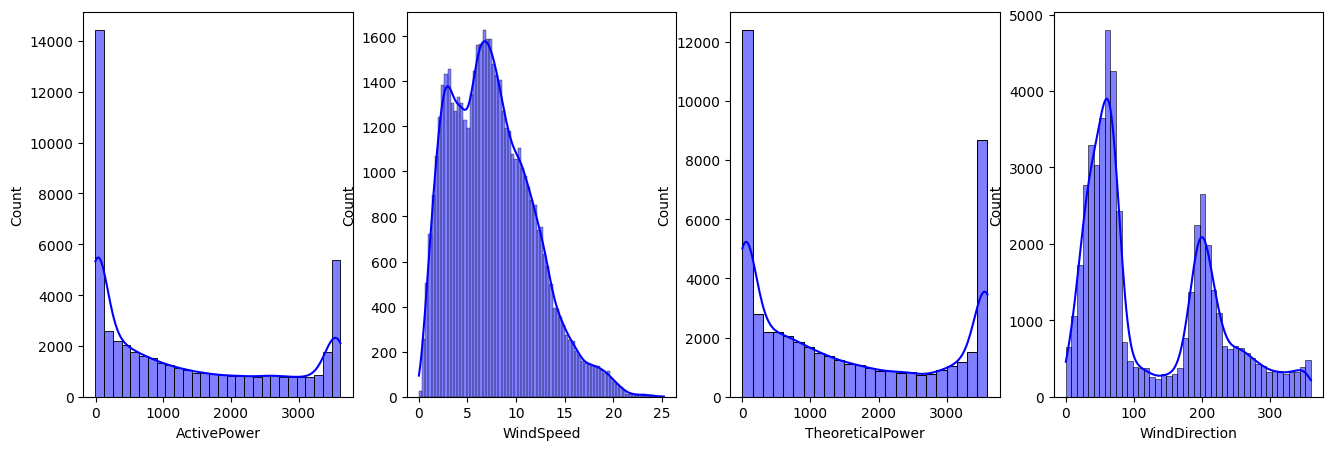

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['ActivePower', 'WindSpeed', 'TheoreticalPower', 'WindDirection']
fig, ax = plt.subplots(1, 4, figsize = (16, 5))
for i, col in enumerate(columns):
    sns.histplot(
        data = df,
        x = col,
        ax = ax[i],
        kde = True,
        color = 'blue'
    )
plt.show()

We can see that the histograms of active power and theoretical power are very similar. And all features have bimodal distribution.

In [19]:
def get_season(month):
    if month in [12, 1, 2]:
        return 3
    elif month in [3, 4, 5]:
        return 0
    elif month in [6, 7, 8]:
        return 1
    else: 
        return 2

In [20]:
df['Season'] = df['Month'].apply(get_season)

In [21]:
df.head()

,ActivePower,WindSpeed,TheoreticalPower,WindDirection,Time,Day,Month,Year,Season
0,380.047791,5.311336,416.328908,259.994904,00:00:00,1,1,2018,3
1,453.769196,5.672167,519.917511,268.641113,00:10:00,1,1,2018,3
2,306.376587,5.216037,390.900016,272.564789,00:20:00,1,1,2018,3
3,419.645905,5.659674,516.127569,271.258087,00:30:00,1,1,2018,3
4,380.650696,5.577941,491.702972,265.674286,00:40:00,1,1,2018,3


We will next see how wind speed, active power and theoretical power depend on seasons.

<Axes: xlabel='Season', ylabel='WindSpeed'>

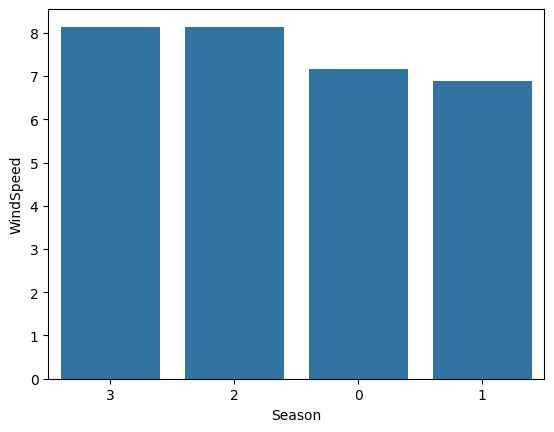

In [22]:
wind_season = df.groupby('Season')['WindSpeed'].mean().sort_values(ascending = False).index
sns.barplot(
    data = df,
    x = 'Season',
    y = 'WindSpeed',
    order = wind_season,
    errorbar = None,
    estimator = np.mean
)

We can see that the mean wind speed in winter and autumn is higher than spring and summer. Let's see the difference among months.

<Axes: xlabel='Month', ylabel='WindSpeed'>

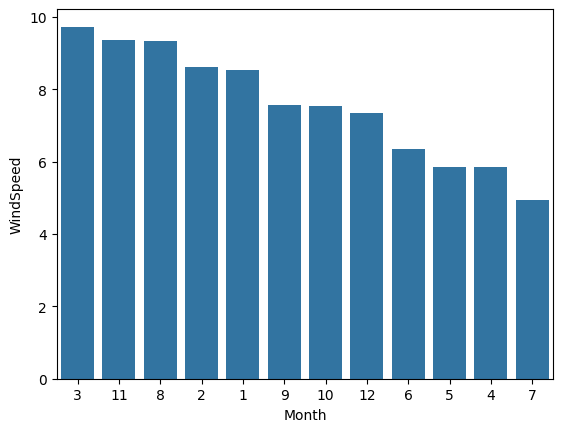

In [23]:
wind_month = df.groupby('Month')['WindSpeed'].mean().sort_values(ascending=False).index
sns.barplot(
    data=df,
    x = 'Month',
    y = 'WindSpeed',
    order = wind_month,
    errorbar = None,
    estimator = np.mean
)

There is difference in months, because the mean wind speed in March is the highest, followed by November and August. Let's see the average value of active power over seasons and months.

<Axes: xlabel='Season', ylabel='ActivePower'>

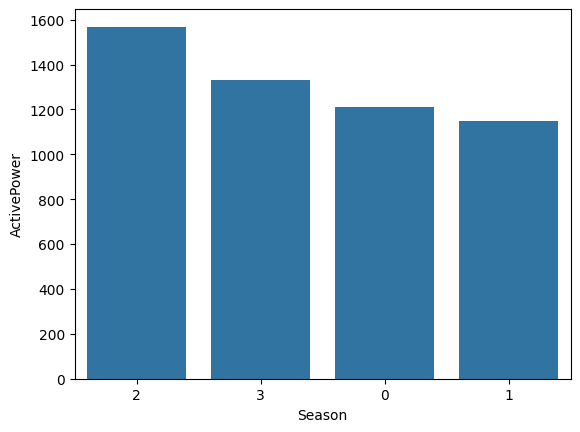

In [24]:
act_pow_season = df.groupby('Season')['ActivePower'].mean().sort_values(ascending=False).index
sns.barplot(
    data = df,
    x = 'Season',
    y = 'ActivePower',
    order = act_pow_season,
    errorbar = None,
    estimator = np.mean
)

The active power is highest in autumn, and then in winter.

<Axes: xlabel='Month', ylabel='ActivePower'>

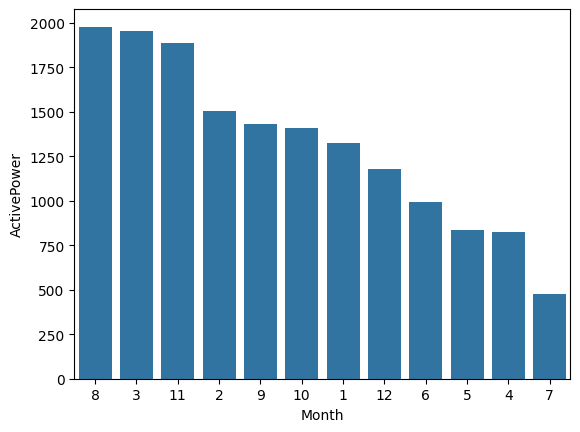

In [26]:
act_pow_month = df.groupby('Month')['ActivePower'].mean().sort_values(ascending=False).index
sns.barplot(
    data = df,
    x = 'Month',
    y = 'ActivePower',
    order = act_pow_month,
    errorbar = None,
    estimator = np.mean
)

As in the case of wind speed, the active power is highest on August, March and November respectively. Next, we will see the average values of theoretical power over seasons and months.

<Axes: xlabel='Season', ylabel='TheoreticalPower'>

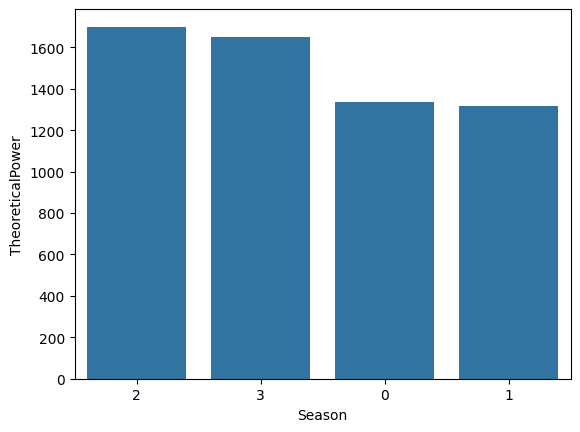

In [27]:
theo_pow_season = df.groupby('Season')['TheoreticalPower'].mean().sort_values(ascending=False).index
sns.barplot(
    data = df,
    x = 'Season',
    y = 'TheoreticalPower',
    order = theo_pow_season,
    errorbar = None,
    estimator = np.mean
)

<Axes: xlabel='Month', ylabel='TheoreticalPower'>

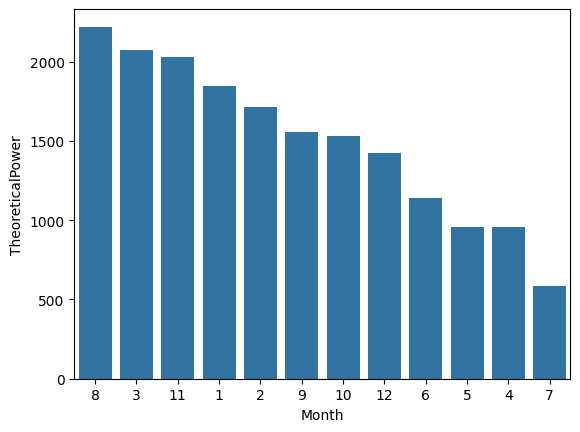

In [28]:
theo_pow_month = df.groupby('Month')['TheoreticalPower'].mean().sort_values(ascending=False).index
sns.barplot(
    data = df,
    x = 'Month',
    y = 'TheoreticalPower',
    order = theo_pow_month,
    errorbar = None,
    estimator = np.mean
)

And again, the highest average theoretical power are in autumn and winter, and it is highest in August, March and November respectively.

For wind direction, let's visualize it with wind speed features over days.

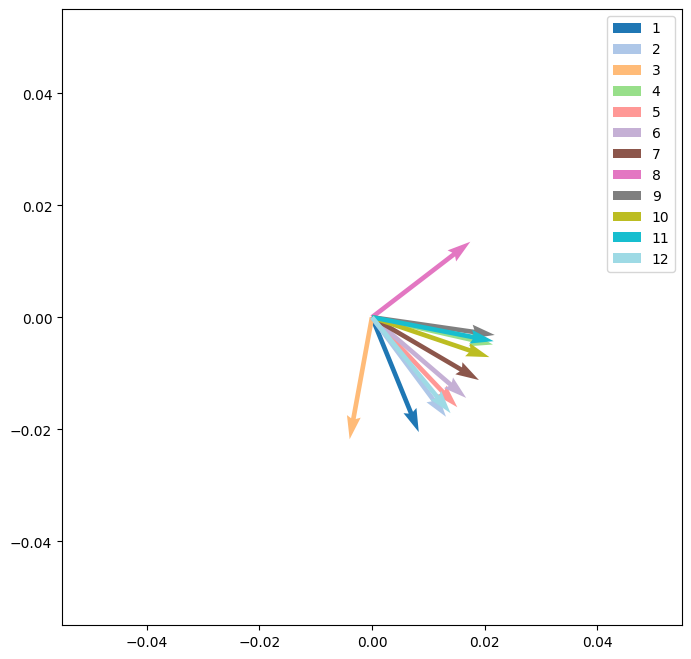

In [93]:
wind_dir_month = df.groupby('Month')['WindDirection'].mean()
wind_dir_month = np.deg2rad(wind_dir_month)
months = df['Month'].unique()
u = np.sin(wind_dir_month)
v = np.cos(wind_dir_month)
colors = plt.cm.tab20(np.linspace(0, 1, len(months)))
plt.figure(figsize=(8, 8))
# plt.subplot(projection = 'polar')
for i, m in enumerate(months):
    plt.quiver(0, 0, u[m], v[m], scale = 5, color = colors[i], label = m)
plt.legend()
plt.show()

We can see that the average wind direction of the three months Nov, Aug and Mar are quite different. Let's next do bivariabte analysis.

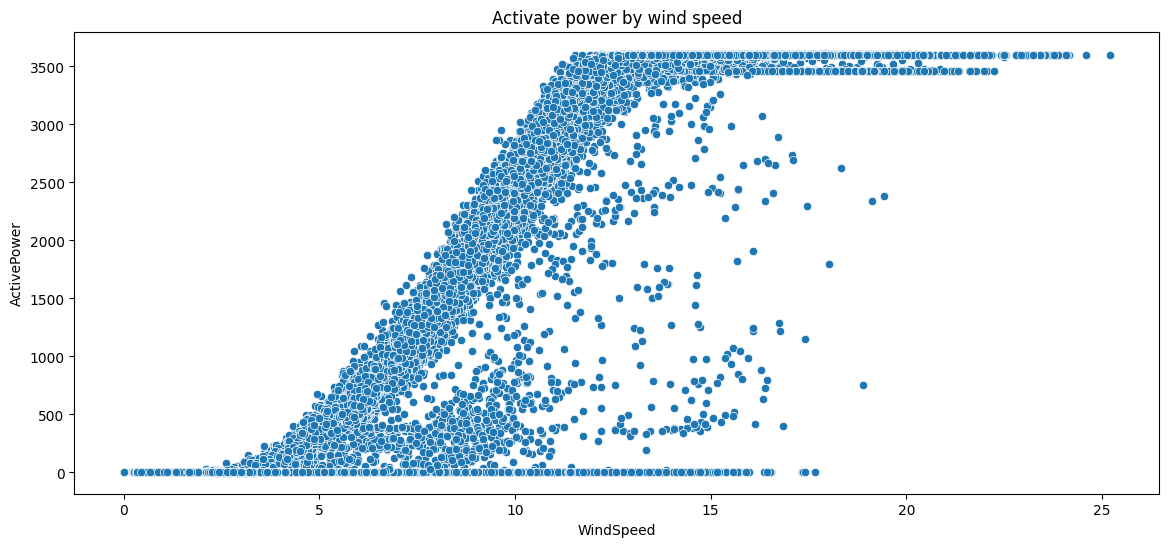

In [97]:
plt.figure(figsize=(14,6))
sns.scatterplot(
    data = df,
    x = 'WindSpeed',
    y = 'ActivePower'
)
plt.title('Activate power by wind speed')
plt.show()

We can see that when the wind speed is high, the active power tends to be high, too. Although, there are some cases when the wind speed is positive and lower than 20, the active power is 0. Let's see next the active power by theoretical power.

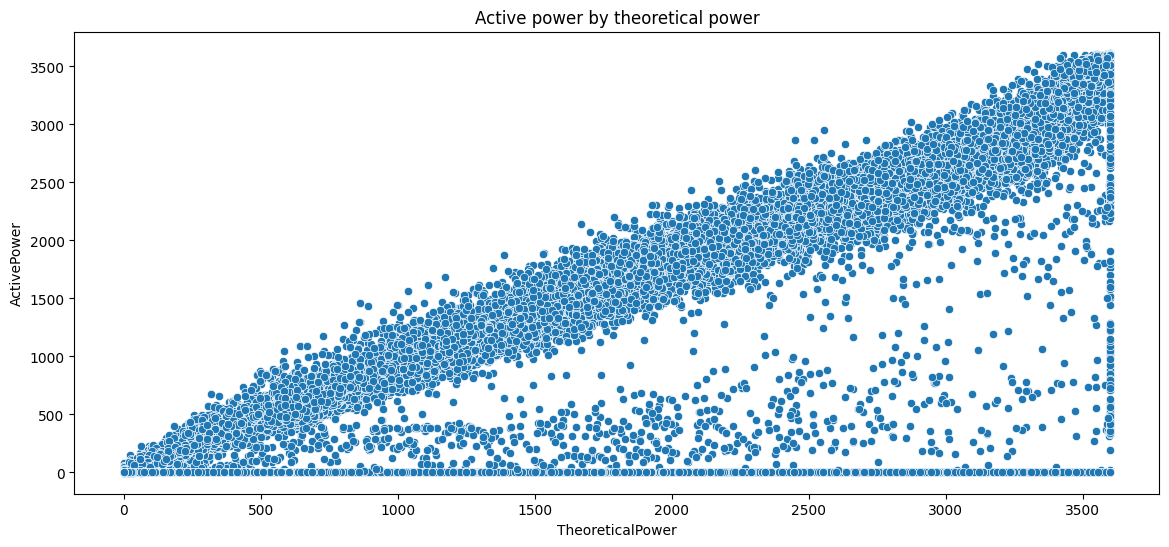

In [98]:
plt.figure(figsize = (14,6))
sns.scatterplot(
    data = df,
    x = 'TheoreticalPower',
    y = 'ActivePower'
)
plt.title('Active power by theoretical power')
plt.show()

When theoretical is high, active power tends to be high, too. Although, there are some cases when the theoretical power is high, the active power is still 0. The figure may imple a linear relationship between theoretical power and active power. We will next see how wind direction affects to active power

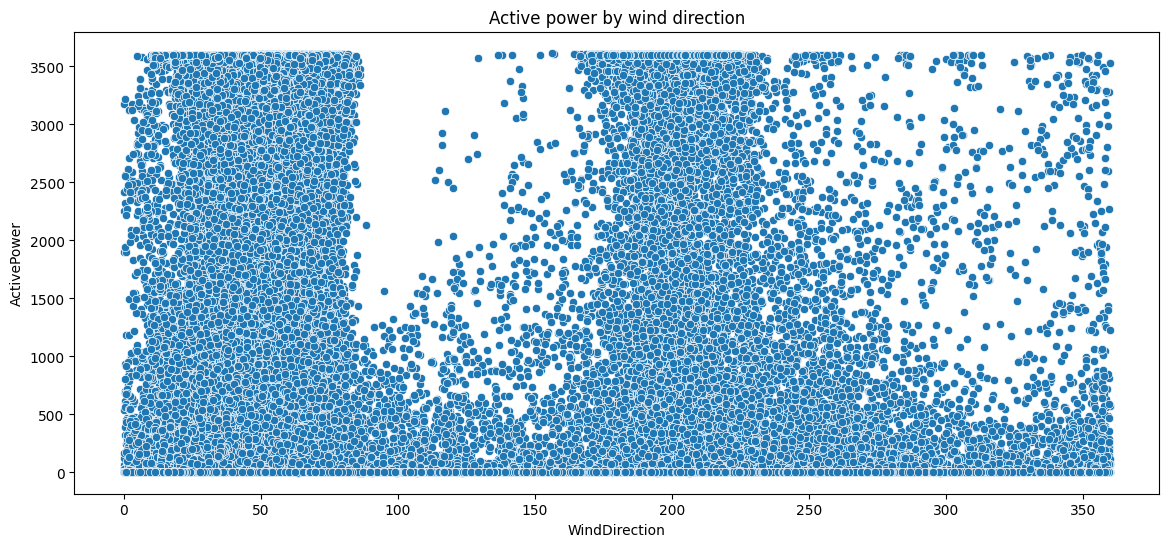

In [99]:
plt.figure(figsize=(14,6))
sns.scatterplot(
    data = df,
    x = 'WindDirection',
    y = 'ActivePower'
)
plt.title('Active power by wind direction')
plt.show()

From the figure, we can see that, the active power is quite dense when the wind direction is from 0 to 100 or from 150 to 250.

In [100]:
df.head()

,ActivePower,WindSpeed,TheoreticalPower,WindDirection,Time,Day,Month,Year,Season
0,380.047791,5.311336,416.328908,259.994904,00:00:00,1,1,2018,3
1,453.769196,5.672167,519.917511,268.641113,00:10:00,1,1,2018,3
2,306.376587,5.216037,390.900016,272.564789,00:20:00,1,1,2018,3
3,419.645905,5.659674,516.127569,271.258087,00:30:00,1,1,2018,3
4,380.650696,5.577941,491.702972,265.674286,00:40:00,1,1,2018,3


Let's plot heat maps for correlations. Our first correlations is Pearson, we will see if there is linearly relationship among values.

In [104]:
columns = ['ActivePower', 'WindSpeed', 'TheoreticalPower']
corr_matrix = df[columns].corr()
print(corr_matrix)

                  ActivePower  WindSpeed  TheoreticalPower
ActivePower          1.000000   0.912774          0.949918
WindSpeed            0.912774   1.000000          0.944209
TheoreticalPower     0.949918   0.944209          1.000000


The Pearson corellation matrix tells us that there is strong linear relationship between wind speed/theoretical power and active power. Let's try to see if the model can predict well using linear regression.

In [107]:
df.head()

,ActivePower,WindSpeed,TheoreticalPower,WindDirection,Time,Day,Month,Year,Season
0,380.047791,5.311336,416.328908,259.994904,00:00:00,1,1,2018,3
1,453.769196,5.672167,519.917511,268.641113,00:10:00,1,1,2018,3
2,306.376587,5.216037,390.900016,272.564789,00:20:00,1,1,2018,3
3,419.645905,5.659674,516.127569,271.258087,00:30:00,1,1,2018,3
4,380.650696,5.577941,491.702972,265.674286,00:40:00,1,1,2018,3


In [108]:
X = df.drop('ActivePower', axis = 1)
y = df['ActivePower']

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder

num_features = ['WindSpeed', 'WindDirection', 'TheoreticalPower']
cat_features = ['Time', 'Day', 'Month', 'Year', 'Season']

preprocessor = ColumnTransformer(
    transformers = [
    ('num_features', StandardScaler(), num_features),
    ('cat_features', BinaryEncoder(), cat_features)
    ]
)

In [113]:
X_transformed = preprocessor.fit_transform(X)

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2)

In [115]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40424, 15)
(40424,)
(10106, 15)
(10106,)


Now, let's try to predict with linear regression.

In [116]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

We need some additional functions for plotting and tunning hyperparameters.

In [117]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# This function is for model evaluation
def model_evaluation(estimator, X, y):
    predicted_values = estimator.predict(X)
    MSELoss = mean_squared_error(predicted_values, y)
    RMSELoss = np.sqrt(MSELoss)
    r2score = r2_score(predicted_values, y)
    print("RMSE loss: ", RMSELoss)
    print("R2 score: ", r2score)
    return predicted_values

# We will plot the results in a certain range
def point_plot(y_pred, y_true, title, range = 200, start_index = 0):
    plt.figure(figsize=(14,6))
    sns.pointplot(
        x = np.arange(range), 
        y = y_pred[start_index : start_index + range], 
        label = 'predicted values', 
        color = 'red'
    )
    sns.pointplot(
        x = np.arange(range),
        y = y_true[start_index : start_index + range],
        label = 'actual values',
        color = 'blue'
    )
    plt.title(title)
    plt.legend()
    plt.show()

# This function is for cross validation
def cross_validation(estimator, X, y, score = 'r2', n = 5):
    validate = cross_val_score(estimator, X, y, scoring = score, cv = n)
    print("Mean valiation R2 score: ", validate.mean())

# This is for hypertunning
def hyper_tune(estimator, X, y, param_grid, score = 'r2', n = 5):
    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring=score,
        cv=n
    )
    grid_search.fit(X, y)
    best_score = grid_search.best_score_
    print("Best R2 score: ", best_score)
    return grid_search.best_estimator_

RMSE loss:  392.3825384028862
R2 score:  0.9016446511567141


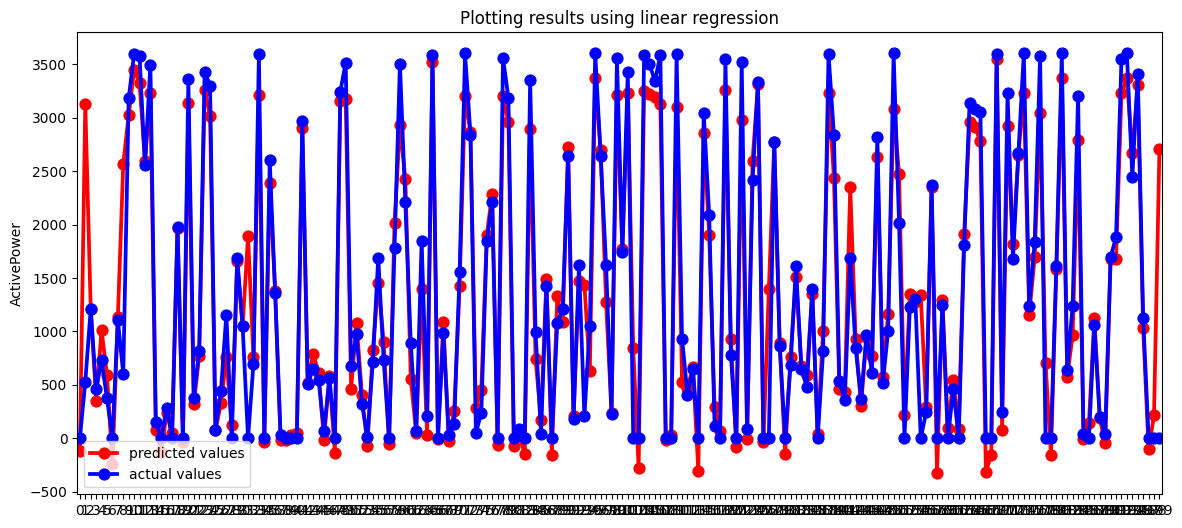

In [118]:
y_pred = model_evaluation(linear_model, X_train, y_train)
title = 'Plotting results using linear regression'
point_plot(y_pred, y_train, title, range = 200, start_index=100)

This result is actually quite good, with R2 score is 0.9.s